# Fusing

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error


In [0]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers

Using TensorFlow backend.


In [0]:
!ls drive/My\ Drive

'Colab Notebooks'	     MatlabResults
 Figures		     Models
 HH_ag.csv		     para_comb_20p_sample.csv
 HH_paramter_space_40s.csv   PR_ag.csv
 HH_voltage_40s.csv	     voltages_AP_30sek_sample.csv


In [0]:
%%time
Y_df = pd.read_csv("drive/My Drive/para_comb_20p_sample.csv",header=None)
X_df = pd.read_csv("drive/My Drive/voltages_AP_30sek_sample.csv",header=None)



CPU times: user 36.4 s, sys: 3.64 s, total: 40 s
Wall time: 52.9 s


In [0]:
names = ['Cm','gL','gNa','EL','eNa','EK','gc','gkdr','gAHP','gC','gCa','ECa','p']
Y_df.columns = names


In [0]:
Y_df.describe()

,Cm,gL,gNa,EL,eNa,EK,gc,gkdr,gAHP,gC,gCa,ECa,p
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.999513,0.000100,0.029999,-60.023932,49.984971,-75.074638,2.099833,0.014993,0.000800,0.015006,0.010003,80.072709,0.499848
std,0.346988,0.000012,0.003462,6.906759,5.774051,8.679948,0.242867,0.001735,0.000092,0.001733,0.001153,9.244658,0.057802
min,2.400023,0.000080,0.024000,-71.999638,40.000048,-89.999176,1.680013,0.012000,0.000640,0.012000,0.008000,64.000175,0.400001
25%,2.697940,0.000090,0.027014,-65.975249,44.974190,-82.625309,1.888724,0.013490,0.000720,0.013512,0.009008,72.085135,0.449931
50%,2.998963,0.000100,0.029982,-60.044432,49.987087,-75.092556,2.101325,0.014988,0.000800,0.015000,0.010004,80.099013,0.499631
75%,3.299588,0.000110,0.033013,-54.052880,54.984041,-67.541063,2.309414,0.016498,0.000880,0.016512,0.011001,88.068443,0.549909
max,3.599994,0.000120,0.036000,-48.000154,59.999527,-60.000225,2.519995,0.018000,0.000960,0.018000,0.012000,95.999927,0.599998


# Split into training and testing data

In [0]:
X = X_df.values
Y = Y_df.values

X_Train, X_test, y_Train, y_test = train_test_split(X,Y,test_size=0.2,random_state=111)


# Standardizes the data

In [0]:
scx = StandardScaler()
scy = StandardScaler()


X_train = scx.fit_transform(X_Train)
y_train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

# Validation split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

# Build a model

In [0]:
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,Dropout,Dense,BatchNormalization

# Model 5

In [0]:
model5 = Sequential()
model5.add(Conv1D(64, 10, activation='relu', input_shape=(X_train.shape[1], 1)))
model5.add(Conv1D(64, 10, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(10))
model5.add(Conv1D(128, 3, activation='relu'))
model5.add(Conv1D(128, 3, activation='relu'))
model5.add(BatchNormalization())
model5.add(GlobalAveragePooling1D())
model5.add(Dropout(rate=0.4))
model5.add(Dense(100, activation='tanh'))
model5.add(Dense(20, activation='tanh'))
model5.add(Dense(13, activation='tanh'))
print(model5.summary())
model5.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1192, 64)          704       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1183, 64)          41024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1183, 64)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 118, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          24704     
_________________________________________________________________
conv1d_4 (Conv1D)    

In [0]:
history5 = model5.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1), y_train,
                  epochs=2000,
                  batch_size=128*8,
                  verbose=0,
                  validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1],1), y_val))

In [0]:
tot_loss = np.concatenate([history5.history['loss'],history5_1.history['loss'],history5_3.history['loss'],history5_4.history['loss']])
tot_valloss = np.concatenate([history5.history['val_loss'],history5_1.history['val_loss'],history5_3.history['val_loss'],history5_4.history['val_loss']])
tot_acc = np.concatenate([history5.history['acc'],history5_1.history['acc'],history5_3.history['acc'],history5_4.history['acc']])
tot_valacc = np.concatenate([history5.history['val_acc'],history5_1.history['val_acc'],history5_3.history['val_acc'],history5_4.history['val_acc']])


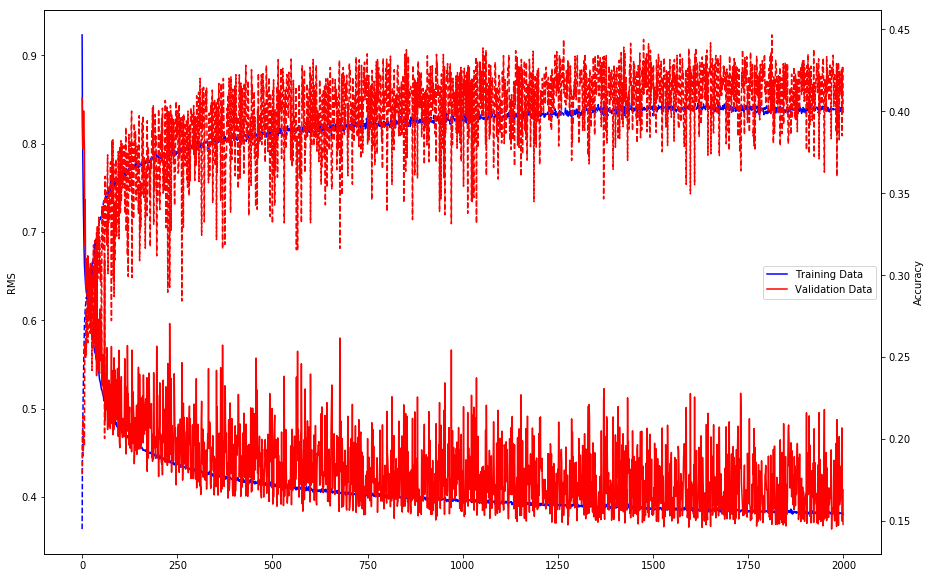

In [0]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history5.history['loss'],label='Training Data',c='blue')
ax.plot(history5.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history5.history['acc'],'--',c='blue')
ax2.plot(history5.history['val_acc'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig("drive/My Drive/Figures/R2plots/PRinverse_training2000_2")

# Model5 test

In [0]:
model5_test = Sequential()
model5_test.add(Conv1D(64, 10, activation='relu', input_shape=(X_train.shape[1], 1)))
model5_test.add(Conv1D(64, 10, activation='relu'))
model5_test.add(BatchNormalization())
model5_test.add(MaxPooling1D(10))
model5_test.add(Conv1D(128, 3, activation='relu'))
model5_test.add(Conv1D(128, 3, activation='relu'))
model5_test.add(BatchNormalization())
model5_test.add(GlobalAveragePooling1D())
model5_test.add(Dropout(rate=0.4))
model5_test.add(Dense(100, activation='tanh'))
model5_test.add(Dense(20, activation='tanh'))
model5_test.add(Dense(13, activation='tanh'))
print(model5_test.summary())
model5_test.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1192, 64)          704       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1183, 64)          41024     
_________________________________________________________________
batch_normalization_7 (Batch (None, 1183, 64)          256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 118, 64)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 116, 128)          24704     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 114, 128)          49280     
_________________________________________________________________
batch_normalization_8 (Batch (None, 114, 128)          512       
__________

In [0]:
%%time
historytest = model5_test.fit(X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1), y_Train,
                  epochs=1250,
                  batch_size=128*8,
                  verbose=0)

In [0]:
results_df = pd.DataFrame()
ypred5_test = model5_test.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))
extra_results_df = pd.DataFrame([r2_score(Y_test[:,i],ypred5_test[:,i]) for i in range(len(names))],index=names,columns=['model5_200'])
results_df = pd.concat([results_df,extra_results_df],axis=1)
results_df

,model5_200
Cm,0.912991
gL,0.636502
gNa,0.790701
EL,0.918291
eNa,0.740553
EK,0.846373
gc,0.472999
gkdr,0.733088
gAHP,-0.001806
gC,0.510682
